In [17]:
import pandas as pd
import json
import numpy as np

In [18]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

In [19]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [20]:
df_customer = pd.json_normalize(df["customer"])
df_phone = pd.json_normalize(df["phone"])
df_internet = pd.json_normalize(df["internet"])
df_account = pd.json_normalize(df["account"])

df_normalizado = pd.concat([df.drop(["customer","phone","internet","account"], axis=1),
                      df_customer, df_phone, df_internet, df_account], axis=1)


In [21]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [22]:
df_normalizado['OnlineSecurity']

0        No
1        No
2        No
3        No
4        No
       ... 
7262    Yes
7263     No
7264     No
7265    Yes
7266    Yes
Name: OnlineSecurity, Length: 7267, dtype: object

In [23]:
df_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [24]:
df_normalizado['tenure'] = pd.to_numeric(df_normalizado['tenure']).astype("Int64")

In [25]:
df_normalizado['SeniorCitizen'] = pd.to_numeric(df_normalizado['SeniorCitizen']).astype("Int64")

In [26]:
df_normalizado = df_normalizado.astype({'customerID': str, 'Churn': str, 'gender': str, 'SeniorCitizen': int, 
                                        'Partner': str, 'Dependents': str, 'tenure': int, 'PhoneService': str, 
                                        'MultipleLines': str, 'InternetService': str, 'OnlineSecurity': str, 
                                        'OnlineBackup': str, 'DeviceProtection': str, 'TechSupport': str, 
                                        'StreamingTV': str, 'StreamingMovies': str, 'Contract': str, 'PaperlessBilling': str, 
                                        'PaymentMethod': str})

In [27]:
df_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [28]:
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(' ', np.nan)

In [29]:
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(float)

In [30]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [31]:
df_normalizado['Charges.Daily'] = df_normalizado['Charges.Monthly'] / 30

In [32]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [36]:
media = sum(df_normalizado['Charges.Daily']) / len(df_normalizado['Charges.Daily']);

In [44]:
sorted = sorted(df_normalizado['Charges.Daily']);

In [55]:
medianaValue = round(len(sorted) / 2);

In [57]:
mediana = sorted[medianaValue];

In [59]:
import statistics as st

In [60]:
desvio_padrao = st.stdev(df_normalizado['Charges.Daily']);

In [62]:
media

2.1573365900646757

In [63]:
mediana

2.3433333333333333

In [64]:
desvio_padrao

1.0043190628555663

Aqui podemos entender que os clientes gastam em média 2.15 por dia com suas assinaturas, sendo a mediana de gastos em 2.34 por dia, como a mediana está abaixo da média, isso nos diz que um grupo de clientes está pagando menos por suas assinaturas, puxando o faturamento pra baixo. O desvio padrão estando em 1.01, nos diz que alguns valores diários estão variando entre 1.14 e 3.16. Como a mediana está abaixo da média, é possível concluir que mais clientes estão próximos de 1.14 do que de 3.16.

In [83]:
import matplotlib.pyplot as plt

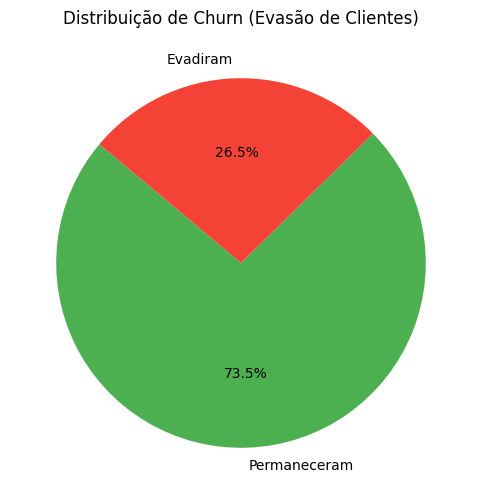

In [97]:
df_normalizado['Churn_clean'] = df_normalizado['Churn'].replace('', np.nan)

df_clean = df_normalizado.dropna(subset=['Churn_clean']).copy()

df_clean['Churn_clean'] = df_clean['Churn_clean'].map({'No': 0, 'Yes': 1})

data = {
    'Cliente': df_clean['customerID'],
    'Churn': df_clean['Churn_clean']
}

df = pd.DataFrame(data)

churn_counts = df['Churn'].value_counts().sort_index()

labels = ['Permaneceram', 'Evadiram']

colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Distribuição de Churn (Evasão de Clientes)')
plt.show()


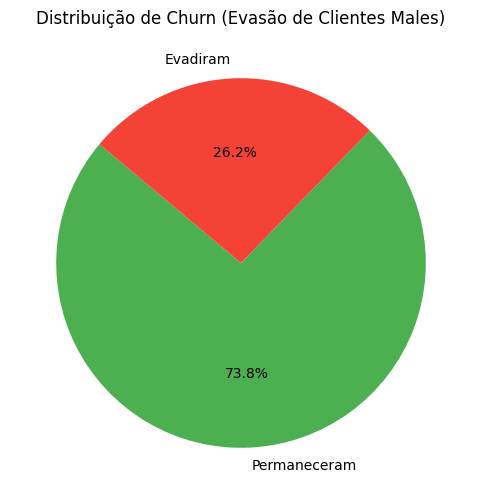

In [103]:
df_clean = df_normalizado.dropna(subset=['Churn_clean']).copy()

df_clean['Churn_clean'] = np.nan

df_clean.loc[df_clean['gender'] == 'Male', 'Churn_clean'] = (
    df_clean.loc[df_clean['gender'] == 'Male', 'Churn']
    .map({'No': 0, 'Yes': 1}))

data = {
    'Cliente': df_clean['customerID'],
    'Churn': df_clean['Churn_clean']
}

df = pd.DataFrame(data)

churn_counts = df['Churn'].value_counts().sort_index()

labels = ['Permaneceram', 'Evadiram']

colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Distribuição de Churn (Evasão de Clientes Males)')
plt.show()


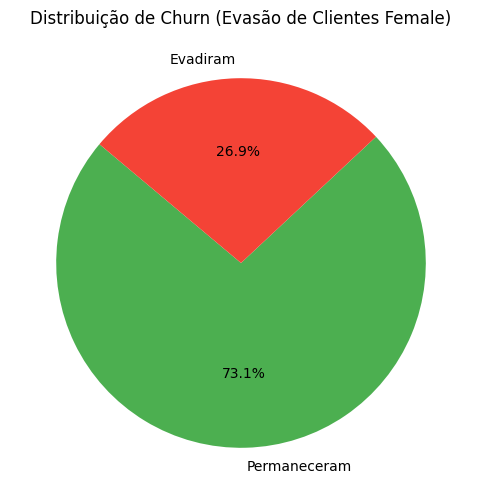

In [106]:
df_clean = df_normalizado.dropna(subset=['Churn_clean']).copy()

df_clean['Churn_clean'] = np.nan

df_clean.loc[df_clean['gender'] == 'Female', 'Churn_clean'] = (
    df_clean.loc[df_clean['gender'] == 'Female', 'Churn']
    .map({'No': 0, 'Yes': 1}))

data = {
    'Cliente': df_clean['customerID'],
    'Churn': df_clean['Churn_clean']
}

df = pd.DataFrame(data)

churn_counts = df['Churn'].value_counts().sort_index()

labels = ['Permaneceram', 'Evadiram']

colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Distribuição de Churn (Evasão de Clientes Female)')
plt.show()


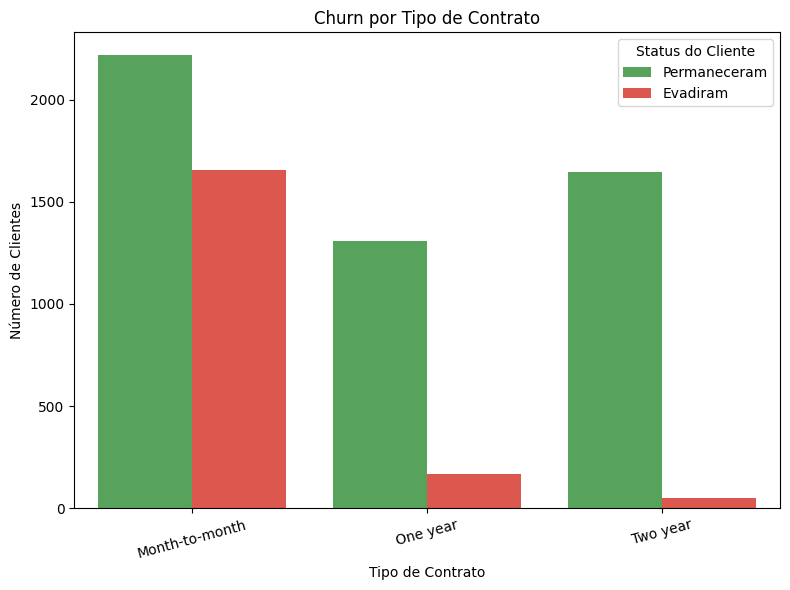

In [122]:

contrato_churn = df_clean.groupby(['Contract', 'Churn']).size().reset_index(name='Contagem')

contrato_churn['Churn_label'] = contrato_churn['Churn'].map({'No': 'Permaneceram', 'Yes': 'Evadiram'})

plt.figure(figsize=(8,6))
sns.barplot(
    data=contrato_churn,
    x='Contract',
    y='Contagem',
    hue='Churn_label',
    palette={'Permaneceram': '#4CAF50', 'Evadiram': '#F44336'}
)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Status do Cliente')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



Aqui fica claro que a evazão se dá em sua maioria em clientes que realizam contratos month-to-month

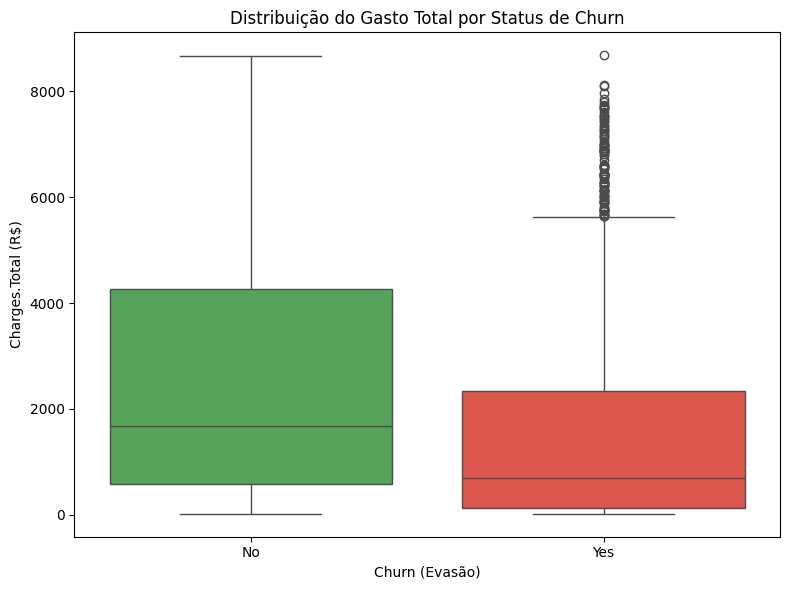

In [129]:

df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_clean,
    x='Churn',
    y='Charges.Total',
    hue='Churn',
    palette={'No': '#4CAF50', 'Yes': '#F44336'},
    legend=False  # remove legenda duplicada
)

plt.title('Distribuição do Gasto Total por Status de Churn')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Charges.Total (R$)')
plt.tight_layout()
plt.show()



No = Clientes que permanecem, não cancelaram, o serviço <br>
Yes = Clientes que cancelaram o serviço.<br>

O indicativo acima representa o grupo total de clientes, onde a mediana dos que permaneceram com o serviço está aproximada aos 1800, enquanto a dos que cancelaram o serviço está aproximada aos 1000, indicando que os que cancelaram, investiram muito menos no serviço, consequentemente estão menos propensos a mante-lo por à longo prazo.

### Relatório Final

#### Introdução

A análise do relatório visa entender o motivo de quebras de contrato dos clientes, entender qual grupo de clientes está mais propenso a desistência e levatar hipóteses para possíveis resoluções.

#### Limpeza e Tratamento de Dados:

Inicialmente, ao importe direto do github, o data set precisou ser normalizado para que as análises fossem possíveis, de modo que foi tratado a normalização do data set, logo em seguida, ajustamos os tipos de dados para melhor fit quanto as análises desejadas, sendo valores numérios tipo double por exemplo. à seguir, foram adicionados uma coluna extra nomeada Charges.Daily, para entendermos qual a cobrança diária por cliente.

#### Análise Exploratória de Dados

Nesta etapa, elaborei a média, mediana, e desvio padrão dos valores cobrados diáriamente, possibilitando assim entender que há uma discrepança nas cobranças puxando a mediana pra baixo em relação a média de valores. Também foi possível identificar que o grupo que contrata planos month-to-month são mais propensos a cancelamentos à curto prazo do que os demais grupos.

#### Conclusões e Insights

O grupo que apresenta maiores níveis de cancelamento são o grupo de contratações month-to-month, indicando que esse grupo precisa de alguma atenção quanto a, valores cobrados, possíveis ajustes de cobranças, etc. Entender o motivo dos cancelamentos é a chave para mudar esse cenário.
Foi visto que clientes que se mantêm por mais tempo, tendem a permanecerem com o serviço, assim sendo há validade em entender qual a curva de conversão, ou seja, há partir de quanto investido o cliente passa à ser mais propenso a permanecer com os serviços contratados.

#### Recomendações

Para tais levantamentos, pesquisa quantitativa multipla escolha é uma alternativa plausível, sendo possível contato via plataformas como Whatsapp ou email.